In [2]:
%reload_ext autoreload
%autoreload 2
from utilities import *
import matplotlib.pyplot as plt
from visuals import *
from matplotlib.colors import ListedColormap

In [3]:
payoffs = load_data("../model/data/processed/50yr_all2.pickle")

In [4]:
utility = 'diminishing'
utility_function = get_marginal_utility_of_df
utilities = utility_function(payoffs,1.2)

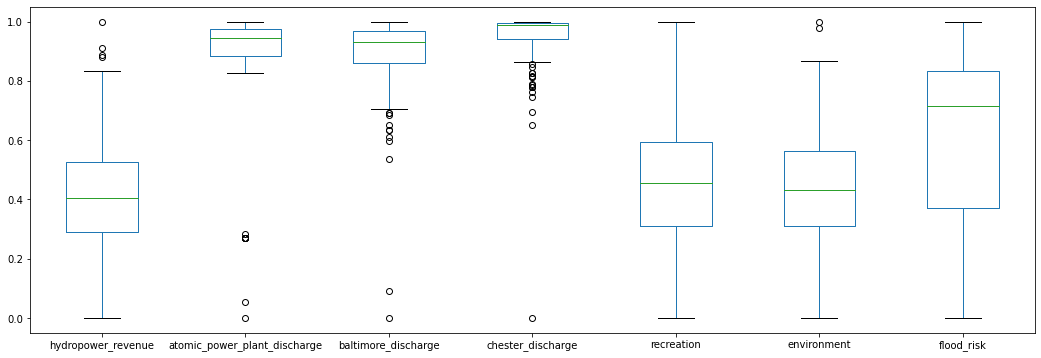

In [193]:
fig = plt.figure(figsize = (18,6))
ax = fig.subplots(nrows = 1, ncols = 1, sharex = True, sharey = True )

normalize(utility_function(payoffs)).boxplot(ax=ax)
ax.grid(False)
plt.savefig('../visuals/A_utility_boxplot.png')

In [148]:
selected_policies = get_fair_policies(utility_function, payoffs, rho = 1.2)
selected_policies

{'utilitarian': 'policy85',
 'hydropower_revenue': 'policy37',
 'atomic_power_plant_discharge': 'policy64',
 'baltimore_discharge': 'policy30',
 'chester_discharge': 'policy2',
 'recreation': 'policy98',
 'environment': 'policy98',
 'flood_risk': 'policy98',
 'egalitarian': 'policy87',
 'prioritarian': 'policy3',
 'suffecientarianism': 'policy2'}

In [149]:
selected_list = list(set([value for key, value in selected_policies.items()]))
utilities = utility_function(payoffs)
selected_payoffs = utilities[utilities.index.isin(selected_list)]
fair_payoffs = payoffs[payoffs.index.isin(selected_list)]

if utility == 'diminishing':
    selected_payoffs = selected_payoffs.rename(index = {'policy2': 'chester', 'policy30': 'baltimore', 'policy37':'hydropower', 'policy64': 'atomicpower', 'policy87': 'egalitarian', 'policy98': 'floodrecenv','policy85':'utilitarian'})
    fair_payoffs = fair_payoffs.rename(index = {'policy2': 'chester', 'policy2': 'baltimore', 'policy37':'hydropower', 'policy64': 'atomicpower', 'policy49': 'egalitarian',  'policy98': 'floodrecenv', 'policy85':'utilitarian', 'policy2':'sufficientarian'})
elif utility == 'linear':
    selected_payoffs = selected_payoffs.rename(index = {'policy2': 'chester', 'policy30': 'baltimore', 'policy37':'hydropower', 'policy64': 'atomicpower', 'policy7': 'egalitarian', 'policy98': 'floodrecenv','policy98':'utilitarian', 'policy1':'sufficientarian'})
    fair_payoffs = fair_payoffs.rename(index = {'policy2': 'chester', 'policy30': 'baltimore', 'policy37':'hydropower', 'policy64': 'atomicpower', 'policy7': 'egalitarian',  'policy98': 'floodrecenv', 'policy98':'utilitarian', 'policy1':'sufficientarian'})


In [ ]:
selected_payoffs = selected_payoffs[~(selected_payoffs.index.isin(['sufficientarian']))]
fair_payoffs = fair_payoffs[~(fair_payoffs.index.isin(['sufficientarian']))]
#fair_payoffs = fair_payoffs[fair_payoffs.index.isin(['egalitarian', 'utilitarian', 'prioritarian', 'prior_util', 'sufficientarian'])]
selected_payoffs = selected_payoffs.sort_values(by = 'decision')
fair_payoffs = fair_payoffs.sort_values(by = 'decision')

fair_payoffs.to_csv(f'../output/processed/fair_payoffs_{utility}.csv')

In [ ]:
color = []
for decision in list(fair_payoffs.index):
    if decision =='egalitarian':
        color.append('yellow')
    elif decision == 'utilitarian':
        color.append('#440154')
    else:
        color.append('#f2f2f2')

In [ ]:
utilities = utility_function(payoffs)
p = payoffs[payoffs.index.isin(['policy99', 'policy70'])]
p.rename(index = {'policy97':'least utility', 'policy70': 'least gini'}, inplace = True)
plot_selected_parcoords(p, payoffs, f'{utility}/03_least_values', color_column = 'chester_discharge', colorscale = 'hot_r')

C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\frame.py:4296: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



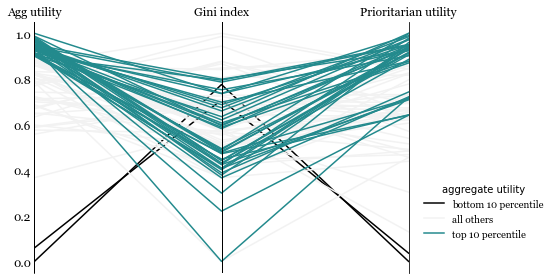

In [151]:
fig = plt.figure(figsize = (8,4))
ax = fig.subplots(nrows = 1, ncols = 1)

df = get_fairness_tradeoffs_df(payoffs)

if utility == 'linear':
    rho = 0
else:
    rho = 1.2
    
df = df[(df['rho']==rho) & (df['gamma']==1)]
df.loc[(df['utility']>=0.90), "utility_col"] = 'top 10 percentile'
df.loc[~((df['utility']>=0.90) | (df.utility<=0.1)), "utility_col"] = 'all others'
df.loc[(df.utility<=0.1), "utility_col"] = 'bottom 10 percentile'
df = df.sort_values(by ='utility')
df.rename(columns = {'utility':'Agg utility', 'gini_index': 'Gini index', 'prioritarian_welfare': 'Prioritarian utility'}, inplace = True)

cmap = "black #f2f2f2   #238A8D".split()
mpl_cmap = ListedColormap(cmap)

pd.plotting.parallel_coordinates(df.reset_index(), 'utility_col', cols = ['Agg utility', 'Gini index', 'Prioritarian utility'], colormap = mpl_cmap)

ax.legend().set_visible(True)
        #ax[2].legend().set_visible(True)

ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
#ax[idx].spines['top'].set_visible(False)
ax.grid(False)

ax.tick_params(axis=u'both', which=u'both',length=0, labeltop = True, labelbottom = False)
for label in ax.get_xticklabels():
    #print(label)
    label.set_fontproperties('Georgia')
    label.set_fontsize(12)

for label in ax.get_yticklabels():
    #print(label)
    label.set_fontproperties('Georgia')
    label.set_fontsize(12)

ax.legend(frameon = False, loc = 'lower center',bbox_to_anchor = (1.2, 0.1), 
title = 'aggregate utility', prop = 'Georgia')
plt.tight_layout()
    
plt.savefig(f'../visuals/{utility}/02_moral_tradeoffs_{utility}.png')
#ax.set_xlabel('marginal utility = '+ str(rho), font = 'Georgia', fontsize = 14)

In [174]:
df = get_fairness_tradeoffs_df(payoffs)
df = df[(df['rho']==1.2) & (df['gamma']==1)]
df.loc[df.prioritarian_welfare >= 0.90, "top_category"] = 2
df.loc[df.utility >= 0.95, "top_category"] = 1
df.loc[df.gini_index >= 0.95, "top_category"] = 3
df.loc[(df.utility >= 0.95) & (df.prioritarian_welfare >=0.95), "top_category"] = 0

df['top_category'] = df['top_category'].fillna('none')
df1 = df[df['top_category']!='none']
df1 = df1.sort_values(by = 'top_category')
df1.index.rename('decision', inplace = True)
df1 = df1[['utility', 'gini_index', 'prioritarian_welfare', 'top_category']].merge(payoffs, on = 'decision')


selected_payoffs = df1
range_df = payoffs
tick_values = [x*1/(selected_payoffs.shape[0]-1) for x in range(selected_payoffs.shape[0])]
fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df1['top_category']#np.array(list(range(0,selected_payoffs.shape[0])))
        , colorscale = ['lightgrey', '#FDE725', '#238A8D', '#440154']#'hot_r'#hot_r'#'viridis'##'viridis'
        ),
        dimensions = list([
            dict(range =[0,3],
                #constraintrange = [1,2], # change this range by dragging the pink line
                label = 'Policy', values = list(df1['top_category']), tickvals = [0,1,2, 3],
                ticktext = list(['priorityutility', 'utilitarian', 'prioritarian', 'egalitarian'] )),

            dict(range =[min(range_df['hydropower_revenue']), max(range_df['hydropower_revenue'])],
                #range = [0,1],    
                #constraintrange = [0,0.5], 
                label = 'Hydropower Revenue', values = selected_payoffs['hydropower_revenue']),

            dict(range =[min(range_df['baltimore_discharge']), max(range_df['baltimore_discharge'])],#range = [0,1],    
                #constraintrange = [0,0.5], 
                label = 'Baltimore', values = selected_payoffs['baltimore_discharge']),

            dict(range =[min(range_df['environment']), max(range_df['environment'])],#range = [0,1],    
                #constraintrange = [0,0.5], 
                label = 'Environment', values = selected_payoffs['environment']),

            dict(range =[min(range_df['atomic_power_plant_discharge']), max(range_df['atomic_power_plant_discharge'])],#range = [0,1],    
                #constraintrange = [0,0.5], 
                label = 'Atomic Power', values = selected_payoffs['atomic_power_plant_discharge']),

            dict(range =[min(range_df['recreation']), max(range_df['recreation'])],#range = [0,1],    
                #constraintrange = [0,0.5], 
                label = 'Recreation', values = selected_payoffs['recreation']),

            dict(range =[min(range_df['chester_discharge']), max(range_df['chester_discharge'])],#range = [0,1],
                #constraintrange = [1,2], # change this range by dragging the pink line
                label = 'Chester', values = selected_payoffs['chester_discharge']),

            dict(range =[min(range_df['flood_risk']), max(range_df['flood_risk'])],#range = [0,1],    
                #constraintrange = [0,0.5], 
                label = 'Flood Risk', values = selected_payoffs['flood_risk'])
            
        ])
    )
)
fig.update_layout(width = 1000, height = 400, font_family = "Georgia", font_size = 14,
#title = {'text': "Visualizing tradeoffs among fair policies", 'xanchor': 'center', 'yanchor': 'top', 'x': 0.4, 'y': 0.10}
)
#fig.write_image(f'../visuals/{utility}/A_app_0.5.png')

fig.show()

No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


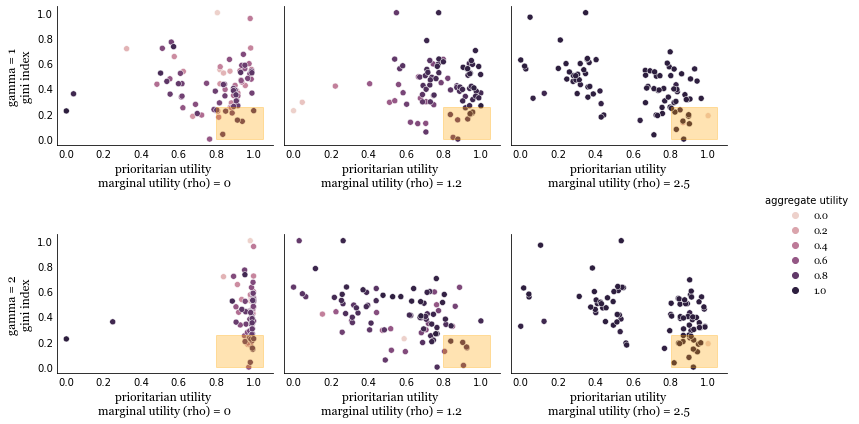

In [ ]:
import matplotlib
fig = plt.figure(figsize = (12,6))
ax = fig.subplots(nrows = 2, ncols = 3, sharey = True)
fairness_principles = ['gini_index', 'prioritarian_welfare'] 

for row, gamma in enumerate(np.arange(1,3,1).tolist()):
    #print(gamma)
    for idx, rho in enumerate([0,1.2, 2.5]):
        welfare = get_all_fairness_metrics(payoffs, get_marginal_utility_of_df, gamma = gamma, rho = rho)
        #welfare['gini_index']
        welfare['gini_index']
        welfare = normalize(welfare).sort_values(by = 'utility')

        ax[row][idx].add_patch(matplotlib.patches.Rectangle((0.8,0), 0.25, 0.25, color="orange", alpha = 0.3))
        sns.scatterplot(data = welfare, x = 'prioritarian_welfare', y = 'gini_index', ax = ax[row][idx], color = cm.hot(0),hue='utility', legend = True, hue_order = range(0,1))
        #sns.scatterplot(data = welfare, x = 'utility', y = 'gini_index', label = rho, ax = ax, color = cm.viridis(rho/1.5), legend = False)
        
        #for idx in [0,1]:
                
            # legend
        ax[row][idx].get_legend().remove()
        #ax[1][1].get_legend()
        ax[1][2].legend(frameon = False, loc = 'lower right', bbox_to_anchor = (1.6, 0.5), 
        title = 'aggregate utility', prop = 'Georgia')
        

        # titles and labels
        #ax.set_title(actor_names[idx], font = 'Georgia', fontsize = 14)
        #ax[0].set_ylabel('prioritarian social welfare', font = 'Georgia', fontsize = 12)
        ax[row][idx].set_ylabel(f'gamma = {gamma}\ngini index', font = 'Georgia', fontsize = 12)
        ax[row][idx].set_xlabel(f'prioritarian utility \nmarginal utility (rho) = {rho}', font = 'Georgia', fontsize = 12)

        #axes lines
        ax[row][idx].spines["top"].set_visible(False)
        ax[row][idx].spines["right"].set_visible(False)
        #ax[row][idx].spines["left"].set_visible(False)
        #axes[7].axis('off')

        #ticks
        ax[row][idx].tick_params(axis=u'both', which=u'both',length=0, labelbottom = True)
        #plt.set_xlabel(f'rho = {rho}')
        fig.tight_layout()

plt.savefig(f'../visuals/{utility}/05_identify_fair_policies_{utility}.png')
plt.show()

In [ ]:
df1 = get_fairness_tradeoffs_df(payoffs)
df = df1[(df1['rho']==1.2) & (df1['gamma']==1)]
        
df.loc[(df['utility']>=0.90), "utility_col"] = 'top 10 percentile'
df.loc[~((df['utility']>=0.90) | (df.utility<=0.1)), "utility_col"] = 'all others'
df.loc[(df.utility<=0.1), "utility_col"] = 'bottom 10 percentile'
df = df.sort_values(by ='utility_col', ascending = False).reset_index()

C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://panda

In [7]:
df = get_fairness_tradeoffs_df(payoffs).reset_index()
df = df[(df['rho']==2) & (df['gamma']==1)]
fair_policies = list(df[(df['gini_index']>=0.8) & (df['utility']>=0.8) & (df['prioritarian_welfare']>=0.8)]['index'])
df = df.set_index('index')
df.index.rename('decision', inplace = True)
df1 = payoffs[payoffs.index.isin(fair_policies)]
df1 = df1.merge(df[['prioritarian_welfare']], on = 'decision')
#plot_selected_parcoords(df1, payoffs, f'{utility}/06_final_fair_policies', color_column = 'prioritarian_welfare')

In [153]:
#df = df.set_index('index')
df1 = payoffs[payoffs.index.isin(['policy64', 'policy75'])]
plot_selected_parcoords(df1, payoffs, f'{utility}/prioritarian_best_worst')

C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
C:\Users\sahit\anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value 

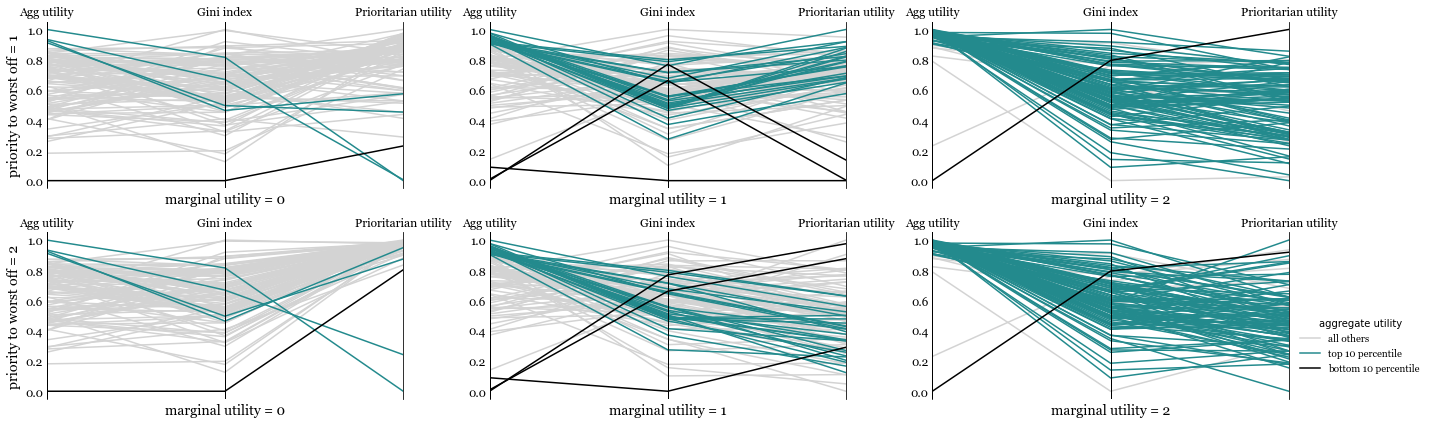

In [6]:
fig = plt.figure(figsize = (20,6))
ax = fig.subplots(nrows = 2, ncols = 3, sharex = True)

df1 = get_fairness_tradeoffs_df(payoffs)

for idx1, gamma in enumerate([1,2]):

    for idx, rho in enumerate([0,1,2]):

        df = df1[(df1['rho']==rho) & (df1['gamma']==gamma)]
        
        df.loc[(df['utility']>=0.90), "utility_col"] = 'top 10 percentile'
        df.loc[~((df['utility']>=0.90) | (df.utility<=0.1)), "utility_col"] = 'all others'
        df.loc[(df.utility<=0.1), "utility_col"] = 'bottom 10 percentile'
        df = df.sort_values(by ='utility_col', ascending = False).reset_index()
        df.rename(columns = {'utility':'Agg utility', 'gini_index': 'Gini index', 'prioritarian_welfare': 'Prioritarian utility'}, inplace = True)

        cmap1 = "#238A8D".split()
        mpl_cmap1 = ListedColormap(cmap1)
        cmap2 = "lightgrey".split()
        mpl_cmap2 = ListedColormap(cmap2)

        
        pd.plotting.parallel_coordinates(df[df['utility_col']=='all others'], 'utility_col', cols = ['Agg utility', 'Gini index', 'Prioritarian utility'], ax = ax[idx1][idx],
        colormap = mpl_cmap2)
        pd.plotting.parallel_coordinates(df[df['utility_col']=='top 10 percentile'], 'utility_col', cols = ['Agg utility', 'Gini index', 'Prioritarian utility'], ax = ax[idx1][idx],
        colormap = mpl_cmap1)
        pd.plotting.parallel_coordinates(df[df['utility_col']=='bottom 10 percentile'], 'utility_col', cols = ['Agg utility', 'Gini index', 'Prioritarian utility'], ax = ax[idx1][idx],
        colormap = 'Greys_r')        

        ax[idx1][idx].legend().set_visible(False)
        ax[1][2].legend().set_visible(True)

        ax[idx1][idx].spines['top'].set_visible(False)
        ax[idx1][idx].spines['bottom'].set_visible(False)
        ax[idx1][idx].grid(False)

        ax[idx1][idx].tick_params(axis=u'both', which=u'both',length=0, labeltop = True, labelbottom = False)
        for label in ax[idx1][idx].get_xticklabels():
            label.set_fontproperties('Georgia')
            label.set_fontsize(12)

        for label in ax[idx1][idx].get_yticklabels():
            label.set_fontproperties('Georgia')
            label.set_fontsize(12)
            
        ax[1][2].legend(frameon = False, loc = 'lower center',bbox_to_anchor = (1.2, 0.1), 
title = 'aggregate utility', prop = 'Georgia')

        ax[idx1][idx].set_xlabel('marginal utility = '+ str(rho), font = 'Georgia', fontsize = 14)
        ax[idx1][0].set_ylabel('priority to worst off = ' + str(gamma), font = 'Georgia', fontsize = 14)
    plt.tight_layout()

    #plt.savefig((f'../visuals/{utility}/05_rho_sensitivity_tradeoffs_czero_chester_0.2.png'))